In [ ]:
# import shutil
# try:
#   shutil.rmtree("./EVA-5")
# except:
#   pass

In [ ]:
pip install wget

In [ ]:
import wget
wget.download("http://cs231n.stanford.edu/tiny-imagenet-200.zip")

'tiny-imagenet-200 (1).zip'

In [ ]:
# !git clone https://github.com/SainadhAmul/EVA-5.git

In [ ]:
import os
os.chdir('./EVA-5/S10')

In [ ]:
os.listdir()

['readme',
 'run.py',
 'model.py',
 'utils.py',
 'main_gradcam.ipynb',
 'data.py',
 '__pycache__',
 'resnet_build.py',
 'gbn.py',
 'Incorrect_GC',
 'main.py',
 'plots.py',
 'device.py',
 'test',
 'gradcam.py',
 'Gradcam_out',
 'loss.png']

In [ ]:
try:
  shutil.rmtree("/content/tiny_image_data")
except:
  pass
os.mkdir("/content/tiny_image_data")  

FileExistsError: ignored

In [ ]:
import zipfile
with zipfile.ZipFile("/content/tiny-imagenet-200.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/tiny_image_data")

In [ ]:
from data import get_data , get_id_dictionary
  
train_data, train_labels, test_data, test_labels = get_data(get_id_dictionary())

print( "train data shape: ",  train_data.shape )
print( "train label shape: ", train_labels.shape )
print( "test data shape: ",   test_data.shape )
print( "test_labels.shape: ", test_labels.shape )

starting loading data
finished loading data, in 17.575690507888794 seconds
train data shape:  (100000, 64, 64, 3)
train label shape:  (100000, 200)
test data shape:  (10000, 64, 64, 3)
test_labels.shape:  (10000, 200)


In [ ]:
def shuffle_data(train_data, train_labels ):
    size = len(train_data)
    train_idx = np.arange(size)
    np.random.shuffle(train_idx)

    return train_data[train_idx], train_labels[train_idx]
  
train_data, train_labels = shuffle_data(train_data, train_labels)

In [ ]:
test_data, test_labels = shuffle_data(test_data, test_labels)

In [ ]:
numpy_horizontal = np.hstack((train_data[0], train_data[1]))
for img,label in zip(train_data[2:10],train_labels[2:10]):
  numpy_horizontal = np.hstack((numpy_horizontal, img))
  print(get_class_to_id_dict()[label.argmax()])
  

('n04146614', 'school bus\n')
('n01698640', 'American alligator, Alligator mississipiensis\n')
('n03977966', 'police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria\n')
('n04417672', 'thatch, thatched roof\n')
('n12267677', 'acorn\n')
('n03026506', 'Christmas stocking\n')
('n03837869', 'obelisk\n')
('n03201208', 'dining table, board\n')


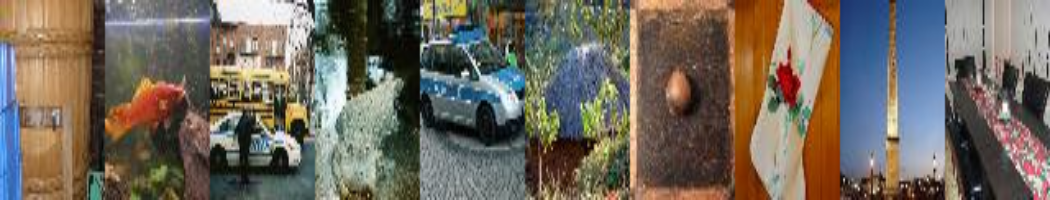

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.resize(numpy_horizontal,(1050, 200)))

In [ ]:
from  data import Dataset

transform = transforms.Compose([transforms.Resize(255),
transforms.CenterCrop(32),
transforms.ToTensor()])

tiny_train_loader = Dataset(train_data, train_labels,transform)
tiny_test_loader = Dataset(test_data, test_labels,transform)

In [ ]:
tiny_train_loader[0][0].shape

torch.Size([3, 32, 32])

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(tiny_train_loader, batch_size=64,
                        shuffle=True, num_workers=0)

test_dataloader = DataLoader(tiny_test_loader, batch_size=64,
                        shuffle=True, num_workers=0)

In [ ]:
from device import get_device

device = get_device(force_cpu=False)

In [ ]:
from resnet_build import ResNet,BasicBlock
model = ResNet(BasicBlock, [2, 2, 2, 2],200).to(device)
# model = ResNet18(200).to(device)

In [ ]:
from torchsummary import summary

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
import torch.optim as optim
import torch.nn as nn
# from torch_lr_finder import LRFinder

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
    
# lr_finder.range_test(train_loader, end_lr=1, num_iter=100)
# lr_finder.range_test(train_loader, val_loader=test_loader, end_lr=1, num_iter=100, step_mode = step_mode)
# lr_finder.plot(log_lr=False)
# lr_finder.reset()

In [ ]:
from run import run_model

lr = 2.10E-02
epochs = 50
regularization = {'l1_factor':0,'l2_factor':0}

model,train_trackers,test_trackers,incorrect_samples = run_model(model, train_dataloader, test_dataloader, epochs, device, lr, **regularization)


Epoch 1:
**********************
(TRAIN) batch_number:  100 Loss : 4.95 Acc : 0.04047
(TRAIN) batch_number:  200 Loss : 4.772 Acc : 0.04148
(TRAIN) batch_number:  300 Loss : 4.574 Acc : 0.04276
(TRAIN) batch_number:  400 Loss : 5.031 Acc : 0.0427
(TRAIN) batch_number:  500 Loss : 4.735 Acc : 0.04353
(TRAIN) batch_number:  600 Loss : 5.042 Acc : 0.04385
(TRAIN) batch_number:  700 Loss : 4.984 Acc : 0.04391
(TRAIN) batch_number:  800 Loss : 4.801 Acc : 0.04492
(TRAIN) batch_number:  900 Loss : 4.78 Acc : 0.04566
(TRAIN) batch_number: 1000 Loss : 4.707 Acc : 0.04625
(TRAIN) batch_number: 1100 Loss : 4.595 Acc : 0.0467
(TRAIN) batch_number: 1200 Loss : 4.881 Acc : 0.04686
(TRAIN) batch_number: 1300 Loss : 5.125 Acc : 0.04679
(TRAIN) batch_number: 1400 Loss : 4.63 Acc : 0.04704
(TRAIN) batch_number: 1500 Loss : 4.652 Acc : 0.0475
(TEST) Correct_classified :  592  of 10000
(TEST) Loss : 4.736 Acc : 0.05929

 ************************************************************ 


Epoch 2:
***********